# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download

Dataset ini merupakan dataset jenis multivariat, yang berarti melibatkan berbagai variabel statistik dan numerik yang terpisah untuk dianalisis. Dataset ini berfokus pada data medis pasien untuk memprediksi keberadaan penyakit jantung.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive')

path = '/content/drive/MyDrive/MSML_DIMAS-AJI-NARINDRA/heart_raw/heart.csv'

if os.path.exists(path):
    df = pd.read_csv(path)
    print("Data berhasil dimuat.")
    display(df.head())
else:
    print("File tidak ditemukan.")

Mounted at /content/drive
Data berhasil dimuat.


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Statistik Deskriptif:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000



Missing Values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Duplikasi Data:
0


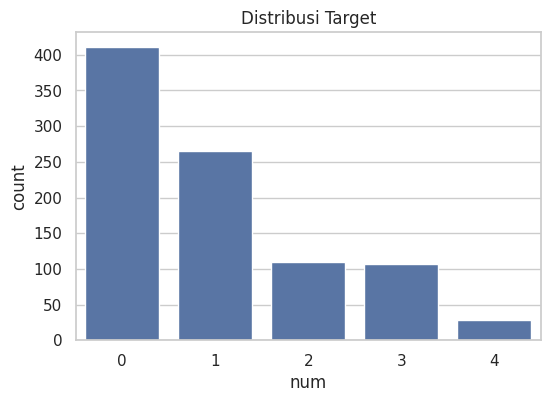

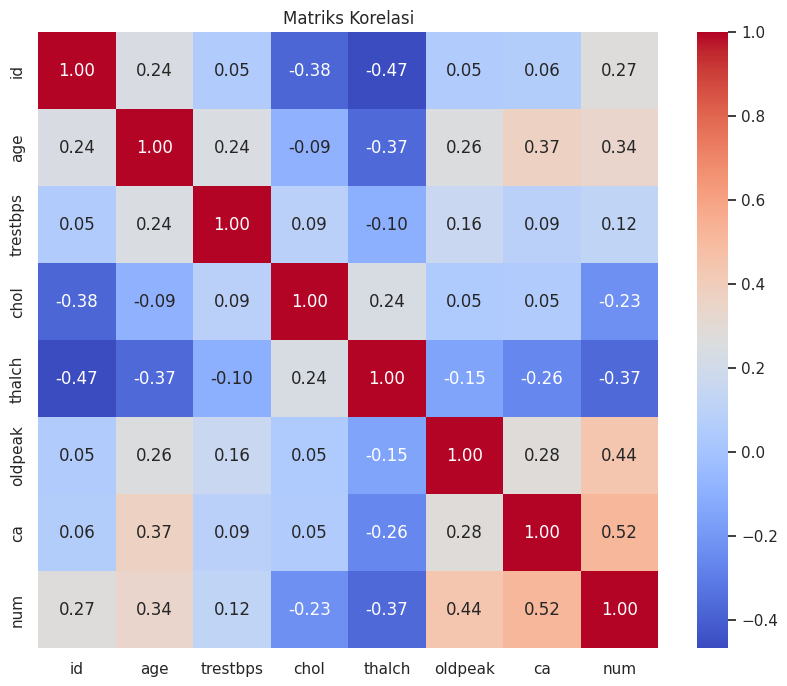

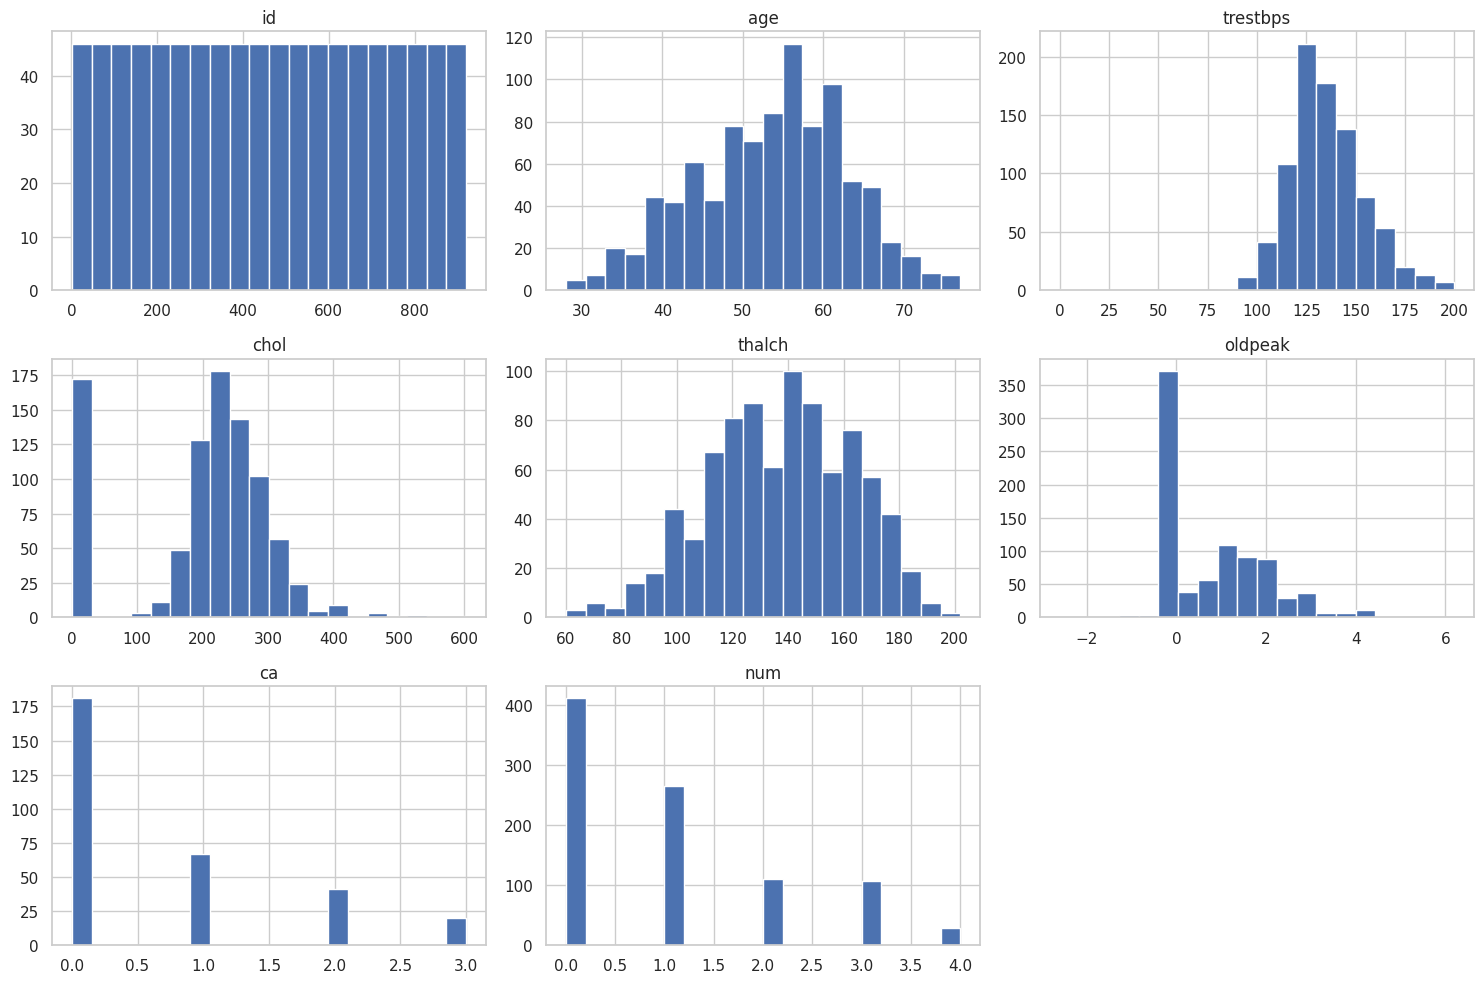

In [3]:
print("Statistik Deskriptif:")
display(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplikasi Data:")
print(df.duplicated().sum())

# Visualisasi distribusi Target
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df)
plt.title('Distribusi Target')
plt.show()

# Matriks Korelasi
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# Distribusi fitur numerik (Umur, Tekanan Darah, Kolesterol, dsb)
numeric_df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
from sklearn.preprocessing import StandardScaler

# Menghilangkan pesan FutureWarning
pd.set_option('future.no_silent_downcasting', True)

# 1. Menghapus fitur tidak relevan
df_clean = df.drop(columns=['id', 'dataset'])

# 2. Menangani anomali chol (0 -> NaN)
df_clean['chol'] = df_clean['chol'].replace(0, np.nan)

# 3. Drop kolom dengan missing values > 30%
df_clean = df_clean.drop(columns=['ca', 'thal', 'slope'])

# 4. Imputasi Missing Values
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0]).infer_objects(copy=False)
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median()).infer_objects(copy=False)

# 5. Transformasi Target ke Binary (0 vs 1)
df_clean['target'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)
df_clean = df_clean.drop(columns=['num'])

# 6. Encoding Kategorikal
df_clean = pd.get_dummies(df_clean, drop_first=True)

# 7. Standardisasi (Scaling)
scaler = StandardScaler()
features = df_clean.drop(columns=['target'])
target = df_clean['target']
features_scaled = scaler.fit_transform(features)

# Mengembalikan ke DataFrame
df_final = pd.DataFrame(features_scaled, columns=features.columns)
df_final['target'] = target.values

print("Preprocessing Berhasil. Data siap dilatih.")
display(df_final.head())

Preprocessing Berhasil. Data siap dilatih.


,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,target
0,1.007386,0.705176,-0.236157,2.380476,0.489727,-0.760292,1.368109,0.516931,-0.482953,-0.533775,4.358899,-1.227523,-0.491493,0
1,1.432034,1.518569,0.787855,-0.420084,-1.181478,1.315283,0.611589,0.516931,-0.482953,-0.533775,-0.229416,-1.227523,-0.491493,1
2,1.432034,-0.650479,-0.313441,-0.420084,-0.345875,1.315283,1.651804,0.516931,-0.482953,-0.533775,-0.229416,-1.227523,-0.491493,1
3,-1.752828,-0.108217,0.092300,-0.420084,1.961979,-0.760292,2.502889,0.516931,-0.482953,1.873447,-0.229416,0.814649,-0.491493,0
4,-1.328180,-0.108217,-0.796466,-0.420084,1.365120,-0.760292,0.517024,-1.934494,2.070593,-0.533775,-0.229416,-1.227523,-0.491493,0


# **6. Tahap Automasi Preprocessing (Kriteria Skilled)**

In [5]:
# ============================================================
# TAHAP 6: AUTOMASI PREPROCESSING (VERSI PERBAIKAN PATH)
# ============================================================
import os

# 1. Definisikan path folder utama dan file skrip
base_path = '/content/drive/MyDrive/MSML_DIMAS-AJI-NARINDRA/'
folder_path = os.path.join(base_path, 'preprocessing/')
file_path = os.path.join(folder_path, 'automate_DIMAS-AJI-NARINDRA.py')

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# 2. Konten Skrip (Tetap menggunakan relative path untuk GitHub Actions)
script_content = """
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    # A. Menghapus fitur tidak relevan
    cols_to_drop = ['id', 'dataset']
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

    # B. Penanganan anomali kolesterol
    if 'chol' in df.columns:
        df['chol'] = df['chol'].replace(0, np.nan)

    # C. Menghapus kolom dengan missing values > 30%
    high_missing_cols = ['ca', 'thal', 'slope']
    df = df.drop(columns=[col for col in high_missing_cols if col in df.columns])

    # D. Imputasi Missing Values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

    # E. Transformasi Target ke Binary
    if 'num' in df.columns:
        df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
        df = df.drop(columns=['num'])

    # F. Encoding Data Kategorikal
    df = pd.get_dummies(df, drop_first=True)

    # G. Standardisasi Fitur
    scaler = StandardScaler()
    target_col = 'target'

    if target_col in df.columns:
        features = df.drop(columns=[target_col])
        target = df[target_col]
        features_scaled = scaler.fit_transform(features)
        df_final = pd.DataFrame(features_scaled, columns=features.columns)
        df_final[target_col] = target.values
    else:
        features_scaled = scaler.fit_transform(df)
        df_final = pd.DataFrame(features_scaled, columns=df.columns)

    return df_final

if __name__ == "__main__":
    # Path relatif untuk kompatibilitas GitHub Actions
    input_path = 'heart_raw/heart.csv'
    output_dir = 'preprocessing/'

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    if os.path.exists(input_path):
        raw_df = pd.read_csv(input_path)
        clean_df = preprocess_data(raw_df)
        output_file = os.path.join(output_dir, 'heart_preprocessed.csv')
        clean_df.to_csv(output_file, index=False)
        print(f"Otomatisasi Berhasil. Data disimpan di: {output_file}")
    else:
        print(f"Gagal: File input tidak ditemukan di {os.getcwd()}/{input_path}")
"""

# 3. Menulis file .py ke Drive
with open(file_path, 'w') as f:
    f.write(script_content.strip())

print(f"Berhasil membuat file: {file_path}")

# 4. Verifikasi: Pindah ke folder utama Drive lalu jalankan script
print("\nMenjalankan verifikasi otomatisasi...")
os.chdir(base_path)
%run {file_path}

Berhasil membuat file: /content/drive/MyDrive/MSML_DIMAS-AJI-NARINDRA/preprocessing/automate_DIMAS-AJI-NARINDRA.py

Menjalankan verifikasi otomatisasi...
Otomatisasi Berhasil. Data disimpan di: preprocessing/heart_preprocessed.csv


<Figure size 640x480 with 0 Axes>